## **Credit Card Fraud Detection Using Machine Learning**

## **Introduction**
In this project, I aim to implement **credit card fraud detection** using various **machine learning models and techniques** to achieve maximum accuracy. The focus will be on writing **clean, efficient, and concise code** for better performance and readability.

### **Why is Fraud Detection Important?**
Imagine receiving a call from your bank, informing you that your credit card is about to expire in a week. The representative requests details like your **card number, expiry date, and CVV** to renew your membership. Would you share these details? 

⚠️ **Sharing such sensitive information could lead to unauthorized access and potential fraud.**  

Despite a **51% growth in digital transactions in India (2018–2019)**, security concerns remain a major issue. Fraudulent activities are rising, with over **52,304 cases of credit/debit card fraud reported in FY 2019** alone. As financial fraud continues to increase, **real-time fraud detection** is essential for protecting consumers and financial institutions. 

Machine learning can play a vital role in **identifying fraudulent transactions** by learning patterns from past data and detecting anomalies efficiently.

---



## **Objective**
The primary goal of this project is to **detect fraudulent credit card transactions** using **machine learning techniques**. Given the increasing number of digital transactions and rising fraud cases, it is crucial to develop an **efficient, accurate, and scalable fraud detection system**.

---

## **Problem Statement**
With the rapid increase in digital transactions, **credit card fraud is becoming a major financial threat**. Traditional rule-based fraud detection systems struggle to identify sophisticated fraudulent patterns, leading to missed detections and **false positives** (legitimate transactions flagged as fraud). 

### **Challenges:**
- **Highly Imbalanced Data**: Fraudulent transactions are extremely rare compared to legitimate transactions.
- **Minimizing False Predictions**: Ensuring that fraud is detected without wrongly flagging legitimate transactions.
- **Scalability**: The model must be capable of handling large-scale transactions in real time.

This project aims to develop **machine learning models** that can **accurately detect fraudulent transactions**, **enhance security**, and **reduce financial losses**.

---

## **Data Description**
The dataset contains **31 columns**, including:
- **Time**: The number of seconds elapsed since the first transaction.
- **V1 to V28**: Anonymized features extracted using **Principal Component Analysis (PCA)** to protect customer privacy.
- **Amount**: The transaction amount.
- **Class**: The target variable, where:
  - `0` → Normal (Legitimate) transaction.
  - `1` → Fraudulent transaction.

Since fraudulent transactions account for only a **small percentage of the total data**, special techniques such as **resampling, anomaly detection, and advanced machine learning models** will be explored to handle the class imbalance effectively.


---#

# Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
len(df)

284807

In [6]:
missing_value = df.isnull().sum()
percentage_missing_value = missing_value / len(df) * 100

In [7]:
pd.DataFrame({'missing_value':missing_value,'percentage_missing_value':percentage_missing_value})

,missing_value,percentage_missing_value
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


In [8]:
df.shape

(284807, 31)

`Handling duplicates`

we observe that there are 1,081 duplicate rows, so we will drop them from the dataset.

In [9]:
duplicate_values = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_values}')

Number of duplicate rows: 1081


In [10]:
num_duplicates = df.duplicated().sum()  # Count duplicate rows
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 1081


In [11]:
df = df.drop_duplicates()  # Drops duplicate rows
print(f'Number of rows after dropping duplicates: {df.shape[0]}')  # Prints updated row count

Number of rows after dropping duplicates: 283726


In [12]:
df.shape

(283726, 31)

## **Possible Issue:**
The value_counts() method sorts values in descending order by default. If fraud transactions are more frequent (which is rare but possible), classes[0] might represent fraud transactions instead of normal ones.

In [18]:
classes=df['Class'].value_counts()
print(classes)
print(f'normal_trans ={classes[0]}')
print(f'fraud_trans ={classes[1]}')
print(f'percentage_normal_trans ={(classes[0] / df["Class"].count())*100:.2f}%')
print(f'percentage_fraud_trans ={(classes[1] / df["Class"].count())*100:.2f}%')

Class
0    283253
1       473
Name: count, dtype: int64
normal_trans =283253
fraud_trans =473
percentage_normal_trans =99.83%
percentage_fraud_trans =0.17%


---
Now that we've confirmed the **class imbalance**, let's explore techniques to handle it before training our model.  

### **Handling Class Imbalance**
Since fraud cases make up only **0.17%** of the dataset, a model trained on this data **might predict all transactions as non-fraudulent**, leading to misleading accuracy.  

To address this, we can use **one or a combination** of the following techniques:

#### **1. Undersampling (Reducing Majority Class)**
- Randomly removes non-fraudulent transactions to **balance the dataset**.
- Risk: Losing valuable information from legitimate transactions.

#### **2. Oversampling (Increasing Minority Class)**
- Uses **SMOTE (Synthetic Minority Over-sampling Technique)** to create synthetic fraud cases.
- Prevents overfitting and improves fraud detection.

#### **3. Cost-Sensitive Learning**
- Assigns a **higher penalty** for misclassifying fraud cases, making the model more sensitive to fraud.

#### **4. Anomaly Detection Models**
- Algorithms like **Isolation Forest** and **One-Class SVM** can be used to detect rare fraud patterns.

---

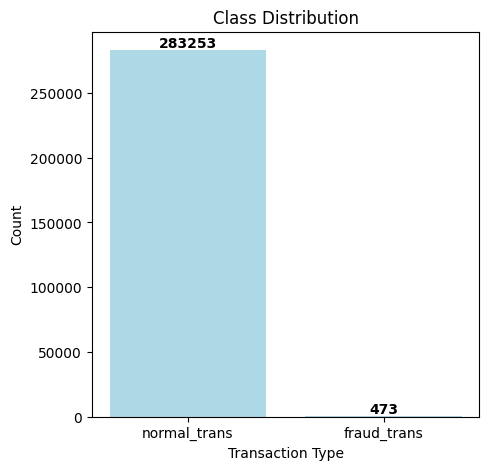

In [19]:
import seaborn as sns
title=['normal_trans','fraud_trans']
value=[classes[0],classes[1]]
plt.figure(figsize=(5, 5))
bars = plt.bar(title, value, color='lightblue')
for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 20,  
             str(int(yval)),  
             ha='center', va='bottom', fontweight='bold') 
plt.title('Class Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

## **1️⃣ Extracting Features and Target Variable**
x = df.drop('Class', axis=1)  # Features

y = df['Class']  # Target variable

🔹 **`df.drop('Class', axis=1)`**  
- `df.drop()` → Drops a specific column from the dataset.  
- `'Class'` → The column to drop (since it's the target variable).  
- `axis=1` → Specifies that we're dropping a **column** (not a row).  
- **Stores the remaining columns (features) in `x`.**
🔹 **`y = df['Class']`**  
- Extracts the **target column** (Class: 0 for normal, 1 for fraud).  
- `y` contains **labels** (0 or 1) for classification.  

---

## **2️⃣ Extracting Feature Names**
```
var = x.columns  # Get all feature names (column names)
```
- `x.columns` returns a **list of feature names**.  
- `var` now stores the **names of all 30 columns** (`Time`, `V1` to `V28`, `Amount`).  

---

## **3️⃣ Creating a Grid of Subplots**
```python
fig, axes = plt.subplots(10, 3, figsize=(30, 45))  
axes = axes.flatten()
```
🔹 **`plt.subplots(10, 3, figsize=(30, 45))`**  
- Creates **multiple subplots** in a **10-row × 3-column grid**.  
- `figsize=(30, 45)` → Controls the **size of the entire figure** (Width=30, Height=45).  
- `fig, axes`:
  - `fig` → The entire figure container.  
  - `axes` → An array of **individual subplots (axes)**.

🔹 **`axes = axes.flatten()`**  
- Converts the `axes` 2D array into a **1D array** (for easier indexing).  

---


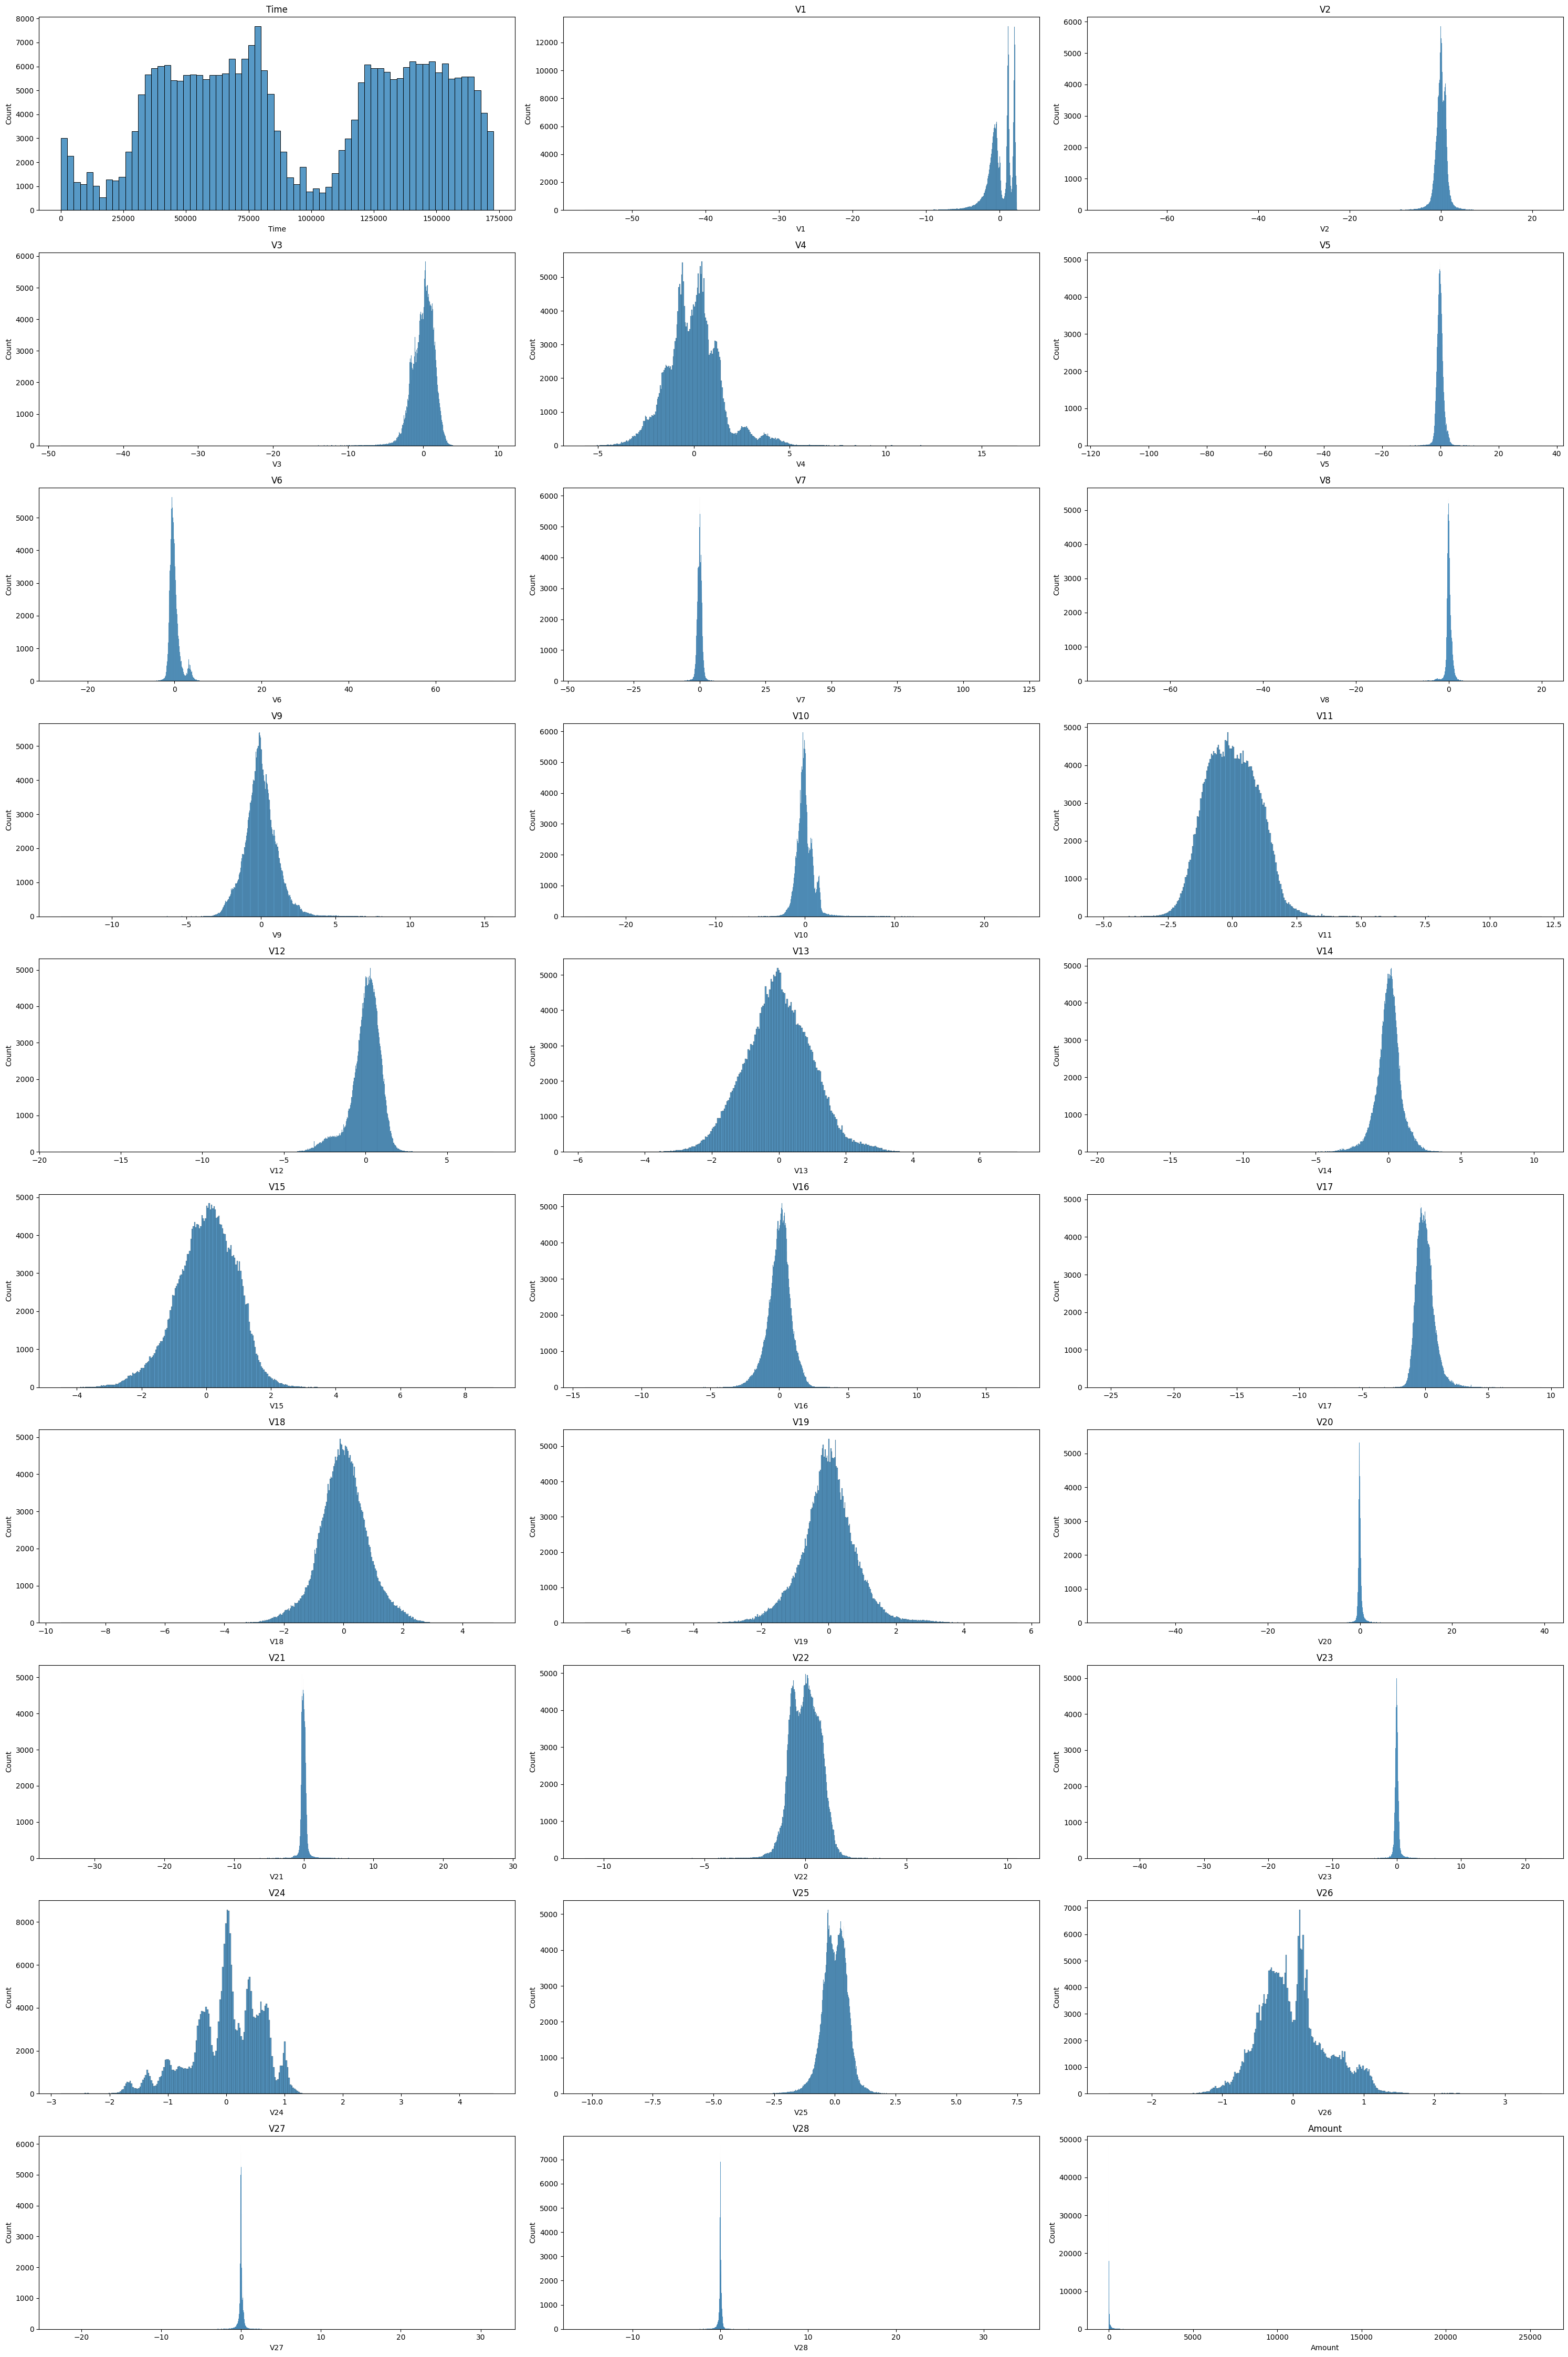

In [28]:
x = df.drop('Class', axis=1)#features
y=df['Class']#target
var=x.columns
fig, axes = plt.subplots(10, 3, figsize=(30, 45))  
axes = axes.flatten()  

for i, ax in enumerate(axes):
    sns.histplot(x[var[i]], ax=ax)  
    ax.set_title(var[i])  

plt.tight_layout()  
plt.show()
    


## **4️⃣ Looping Through Each Feature**
```
for i, ax in enumerate(axes):  
    sns.histplot(x[var[i]], ax=ax)  
    ax.set_title(var[i])  
```
🔹 **`for i, ax in enumerate(axes):`**  
- Loops over `axes` (subplot list).  
- `i` → Index of the feature.  
- `ax` → The subplot where the histogram will be drawn.

🔹 **`sns.histplot(x[var[i]], ax=ax)`**  
- `sns.histplot()` → Creates a **histogram** to show feature distribution.  
- `x[var[i]]` → Selects the **i-th feature** (column) from `x`.  
- `ax=ax` → Plots the histogram in the **corresponding subplot**.

🔹 **`ax.set_title(var[i])`**  
- Sets the **title** of each subplot to the corresponding feature name.  

---

## **5️⃣ Adjusting Layout for Better Visualization**
```
plt.tight_layout()  
plt.show()
```
🔹 **`plt.tight_layout()`**  
- Adjusts spacing between subplots **to prevent overlap**.  

🔹 **`plt.show()`**  
- Displays the **final visualization**.  


==========================================================


`Understanding Skewness in Data`
Skewness measures asymmetry in the distribution of data. When analyzing fraud detection datasets, many features are not normally distributed, which can affect the model's performance.

In [29]:
skewness=x.skew()
skew=[]
for i in var:
  skew.append(x[i].skew())
skew_df = pd.DataFrame({'Features': var, 'Skewness': skew})
print(skew_df)

   Features   Skewness
0      Time  -0.035581
1        V1  -3.273271
2        V2  -4.695162
3        V3  -2.151984
4        V4   0.671504
5        V5  -2.414079
6        V6   1.829880
7        V7   2.890271
8        V8  -8.310970
9        V9   0.537663
10      V10   1.252967
11      V11   0.344074
12      V12  -2.199008
13      V13   0.064293
14      V14  -1.918804
15      V15  -0.309659
16      V16  -1.051161
17      V17  -3.690497
18      V18  -0.248661
19      V19   0.108312
20      V20  -2.043121
21      V21   2.820033
22      V22  -0.182330
23      V23  -5.867221
24      V24  -0.552129
25      V25  -0.415744
26      V26   0.580292
27      V27  -0.753804
28      V28  11.555115
29   Amount  16.978803


In [30]:
from sklearn.preprocessing import PowerTransformer
skewed_columns = skew_df.loc[abs(skew_df['Skewness']) > 1, 'Features']
print("Highly skewed columns:", list(skewed_columns))
pt = PowerTransformer(method='yeo-johnson', copy=False) 
x[skewed_columns] = pt.fit_transform(x[skewed_columns])


Highly skewed columns: ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V28', 'Amount']


`Understanding Scatter Plots in Fraud Detection`
A scatter plot helps us analyze relationships between two variables by plotting each data point as a dot on a 2D plane.

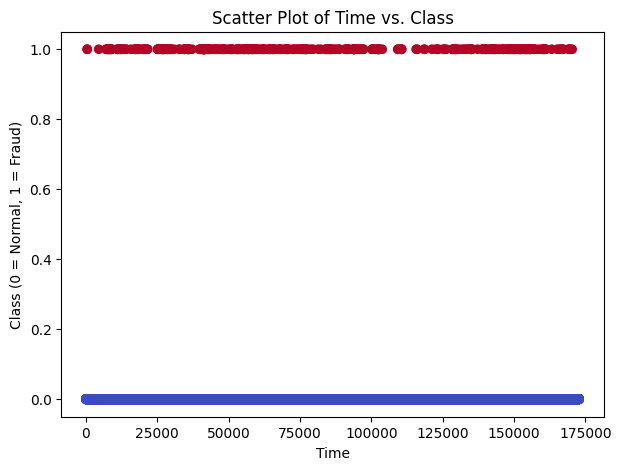

In [31]:
plt.figure(figsize=(7,5))
plt.scatter(x['Time'],y,c=y,cmap='coolwarm')
plt.xlabel('Time')
plt.ylabel('Class (0 = Normal, 1 = Fraud)')
plt.title('Scatter Plot of Time vs. Class')
plt.show()

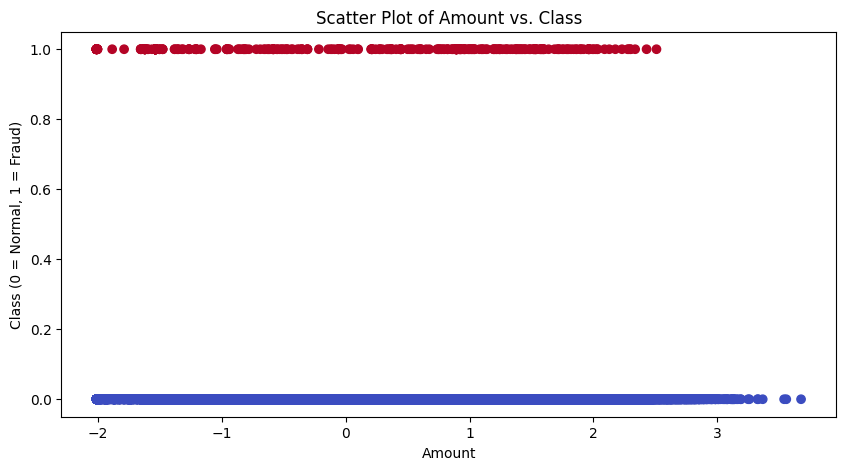

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(x['Amount'],y,c=y,cmap='coolwarm')
plt.xlabel('Amount')
plt.ylabel('Class (0 = Normal, 1 = Fraud)')
plt.title('Scatter Plot of Amount vs. Class')
plt.show()

### **Understanding Outliers & Normalization in Fraud Detection**  

#### **📌 What are Outliers?**  
Outliers are **data points that are significantly different** from the majority. In fraud detection, outliers are crucial because **fraudulent transactions** often appear as extreme values.

---

### **⚠️ Why Not Remove Outliers?**
- Some high-value transactions are **legitimate**, so **removing all outliers** might remove valid transactions.
- Instead of removing them, we **normalize** the data to reduce the impact of extreme values.


In [33]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x[['Amount']]=scaler.fit_transform(x[['Amount']])
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-0.908517,-0.131109,2.174201,1.378155,-0.257317,0.460075,0.195593,0.022528,0.363787,...,0.323745,-0.009113,0.277838,-0.190040,0.066928,0.128539,-0.189115,0.133558,-0.055175,0.727319
1,0.0,0.625754,0.094915,-0.033947,0.448154,0.031415,0.046651,-0.063677,0.008792,-0.255425,...,-0.093514,-0.302964,-0.638672,0.153295,-0.339846,0.167170,0.125895,-0.008983,0.056557,-0.769227
2,1.0,-0.907941,-0.873965,1.381479,0.379780,-0.376027,1.321920,0.643991,0.176162,-1.514654,...,0.681493,0.360668,0.771679,1.502750,-0.689281,-0.327642,-0.139097,-0.055353,-0.176605,1.063378
3,1.0,-0.745930,-0.202749,1.401190,-0.863291,-0.019788,0.984293,0.193974,0.314385,-1.387024,...,-0.273716,-0.135973,0.005274,-0.318214,-1.175575,0.647376,-0.221929,0.062723,0.201741,0.656353
4,2.0,-0.827019,0.535699,1.161194,0.403034,-0.306955,0.188177,0.482810,-0.333172,0.817739,...,0.529069,0.003346,0.798278,-0.233430,0.141267,-0.206010,0.502292,0.219422,0.673579,0.443484



---

### **🔹 Why Use RobustScaler?**  
- Unlike MinMaxScaler or StandardScaler, **RobustScaler** is **not affected by outliers**.
- It **scales based on the median and interquartile range (IQR)**.
- Works well when only a few features (like `Amount`) have large variations.

---

### **🟢 Understanding SMOTE (Synthetic Minority Over-sampling Technique)**  

Since our dataset is **highly imbalanced** (99.83% normal transactions, 0.17% fraudulent), using a regular machine learning model **without balancing** can result in:  
- **Biased predictions** (favoring normal transactions).  
- **Poor fraud detection** (fraud cases are rare and underrepresented).  

To fix this, we use **SMOTE (Synthetic Minority Over-sampling Technique)**, which **generates synthetic samples** for the minority class (fraud cases) instead of simply duplicating them.

---

### **📌 Why Use SMOTE?**
✅ Creates **synthetic (new) fraud transactions** instead of just copying existing ones.  
✅ Prevents **overfitting** by **diversifying the fraud cases**.  
✅ Balances the dataset so that the model learns **equally from normal & fraud cases**.  

---

In [35]:
!pip install imbalanced-learn

In [36]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before SMOTE:", Counter(y))  

smote = SMOTE(sampling_strategy=0.1, random_state=42) 
X_resampled, y_resampled = smote.fit_resample(x, y)

print("After SMOTE:", Counter(y_resampled))  

Before SMOTE: Counter({0: 283253, 1: 473})
After SMOTE: Counter({0: 283253, 1: 28325})


### **🟢 Understanding StratifiedKFold for Imbalanced Data**  

Since our dataset is **highly imbalanced**, we cannot use **regular K-Fold cross-validation** because:  
❌ It may **randomly split data**, causing some folds to have **very few fraud cases**.  
❌ This leads to **biased training**, where some models barely learn about fraud cases.  

👉 **Solution?** Use **StratifiedKFold**, which ensures **each fold has the same class distribution** as the original dataset.  

---

### **📌 Why Use StratifiedKFold?**  
✅ Ensures **both normal & fraud cases** appear in every fold.  
✅ Prevents **data imbalance** in training & validation sets.  
✅ Improves **model generalization** and **performance consistency**.

---

### **🔹 Applying StratifiedKFold in Python**  

```python
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold (5 splits)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Splitting the dataset
for train_index, test_index in skf.split(x, y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Check class distribution in each fold
    print("Fold class distribution:")
    print(y_train.value_counts(normalize=True))  # Should be ~same as original dataset
```

In [37]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

### **🟢 Model Building for Credit Card Fraud Detection**  

Since our dataset is imbalanced and complex, we will use two different models:  
1. **Logistic Regression** → A simple, interpretable model for detecting **linear patterns**.  
2. **Random Forest** → A more powerful, ensemble model for handling **non-linear relationships**.  

### **📌 Why These Models?**  
✅ **Logistic Regression**: Acts as a **baseline model** to compare performance.  
✅ **Random Forest**: Works well with **imbalanced data** and captures **complex patterns**.  
✅ **Hyperparameter Tuning (Greedy Search)**: Optimizes model parameters to improve accuracy.  

```

# LogisticRegression¶


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,r2_score,accuracy_score,recall_score,roc_auc_score
C_values = [ 0.01, 0.1, 0.5, 1, 2]

for c in C_values:
    mean_accuracy_list=[]
    mean_roc_auc_list=[]
    mean_precision_list=[]
    accur_list=[]
    roc_auc_list=[]
    precision_list=[]
    for train_index,val_index in skf.split(X_resampled,y_resampled):
        x_train,x_val=X_resampled.iloc[train_index],X_resampled.iloc[val_index]
        y_train,y_val=y_resampled.iloc[train_index],y_resampled.iloc[val_index]
        model=LogisticRegression(C=c)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_val)
        accur_list.append(accuracy_score(y_val,y_pred))
        precision_list.append(precision_score(y_val,y_pred))
        y_pred_prob=model.predict_proba(x_val)
        roc_auc_list.append(roc_auc_score(y_val,y_pred))
    mean_accuracy_list=np.mean(accur_list)
    mean_roc_auc_list=np.mean(roc_auc_list)
    mean_precision_list=np.mean(precision_list)
    print("===============================================")
    print('C_value',c) 
    print('mean_accuracy_list',mean_accuracy_list)
    print('mean_roc_auc_list',mean_roc_auc_list)
    print('mean_precision_list',mean_precision_list)
    print("===============================================")
    print('')

C_value 0.01
mean_accuracy_list 0.9838853057556948
mean_roc_auc_list 0.9523884280057097
mean_precision_list 0.9297495766213306

C_value 0.1
mean_accuracy_list 0.9832883420810443
mean_roc_auc_list 0.9533946087862128
mean_precision_list 0.9207099790176754

C_value 0.5
mean_accuracy_list 0.9839366568305552
mean_roc_auc_list 0.9537194091078053
mean_precision_list 0.9280641992087982

C_value 1
mean_accuracy_list 0.9852974639196095
mean_roc_auc_list 0.9533080964614749
mean_precision_list 0.9366374379180963

C_value 2
mean_accuracy_list 0.9856537134886206
mean_roc_auc_list 0.9536152420707934
mean_precision_list 0.9383841529795116



### **🟢 Random Forest vs Logistic Regression for Fraud Detection**  

Now, we will train both **Random Forest** and **Logistic Regression** and compare their performance using:  
✅ **Accuracy** → Overall correctness of predictions.  
✅ **Precision** → How many detected frauds are actually frauds? (Lower False Positives).  
✅ **Recall (Sensitivity)** → How many actual frauds were detected? (Lower False Negatives).  
✅ **F1-score** → Balances Precision & Recall.  
✅ **ROC-AUC Score** → Measures overall model performance (closer to 1 = better).  

---


In [39]:
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier  

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=30, max_depth=30, max_samples=0.2, bootstrap=True, random_state=42)
rf.fit(x_train, y_train)

y_predict = rf.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)  # Get probability scores

accuracy = accuracy_score(y_test, y_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9961968033891777
ROC AUC Score: 0.9996778784565312


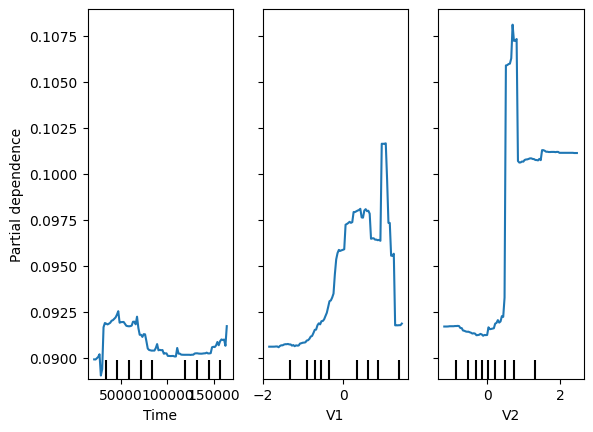

In [40]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(rf, X_resampled, features=[0, 1, 2])  # Change features as needed
plt.show()